# Minimal example

[This note-book is in oceantracker/tutorials_how_to/]

Main steps are 

    1. build parameters, ie. provide users settings and add "classes" with their specific settings, to the computational pipeline.

    2. run oceantracker with these parameters

    3. plot results

See next notebook for more details on the process.

This example uses helper methods of OceanTracker class to build parameters. The example is part of a a 3D Schisim model, where particles always re-suspend if the land on the bottom. Particles stranded by the falling tide in dry cells are frozen, until the cell becomes wet.  

In [1]:
# minimal_example.py
#-------------------

from oceantracker.main import OceanTracker
# make instance of oceantracker to use to set parameters using code, then run
ot = OceanTracker()

# ot.settings method use to set basic settings
ot.settings(output_file_base='minimal_example', # name used as base for output files
            root_output_dir='output',             #  output is put in dir   'root_output_dir'\\'output_file_base'
            time_step= 120. #  2 min time step as seconds
            )
# ot.set_class, sets parameters for a named class
ot.add_class('reader',input_dir= '..\\demos\\demo_hindcast',  # folder to search for hindcast files, sub-dirs will, by default, also be searched
                      file_mask=  'demoHindcastSchism*.nc')  # hindcast file mask
# add  release locations from two points,
#               (ie locations where particles are released at the same times and locations)
# note : can add multiple release groups
ot.add_class('release_groups', name='my_release_point', # user must provide a name for group first
                    points= [[1595000, 5482600],        #[x,y] pairs of release locations
                             [1599000, 5486200]],      # must be an N by 2 or 3 or list, convertible to a numpy array
                    release_interval= 3600,           # seconds between releasing particles
                    pulse_size= 10,                   # number of particles released each release_interval
            )
# run oceantracker
case_info_file_name, has_errors = ot.run()

# output now in folder output/minimal_example
# case_info_file_name the name a json file with useful ingo for post processing, eg output file names


startup: --------------------------------------------------------------------------
startup: OceanTracker- preliminary setup
startup:      Python version: 3.10.10 | packaged by Anaconda, Inc. | (main, Mar 21 2023, 18:39:17) [MSC v.1916 64 bit (AMD64)]
startup:   - found hydro-model files of type SCHISIM
startup:       -  sorted hyrdo-model files in time order,	  0.603 sec
startup:     >>> Note: output is in dir= e:\OneDrive - Cawthron\H_Local_drive\ParticleTracking\oceantracker\tutorials_how_to\output\minimal_example
startup:     >>> Note: to help with debugging, parameters as given by user  are in "minimal_example_raw_user_params.json"
P000: --------------------------------------------------------------------------
P000: Starting case number   0,  minimal_example at 2023-06-10T06:35:26.533109
P000: --------------------------------------------------------------------------
P000:       -  built node to triangles map,	  0.636 sec
P000:       -  built triangle adjacency matrix,	  0.300 se

## Read and plot output

  A first basic plot of particle tracks

dict_keys(['dimensions', 'total_num_particles_released', 'IDpulse', 'time', 'IDrelease_group', 'dry_cell_index', 'status', 'x0', 'x', 'release_groupID', 'release_locations', 'z', 'grid', 'particle_status_flags', 'particle_release_group_info', 'full_case_params', 'axis_lim'])


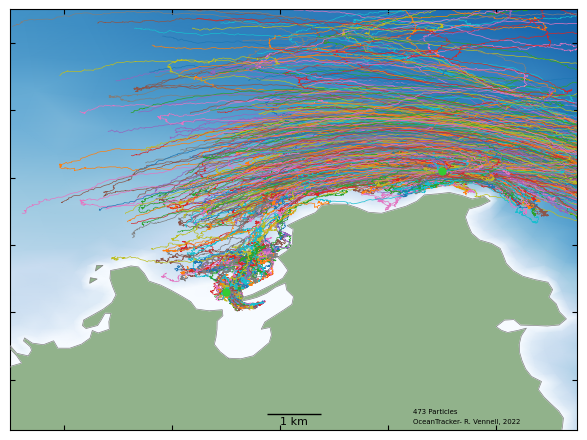

In [2]:
# read output files
from oceantracker.post_processing.read_output_files import  load_output_files

# read particle track data into a dictionary using case_info_file_name
tracks = load_output_files.load_particle_track_vars(case_info_file_name)
print(tracks.keys()) # show what is in tracks dictionary holds

from oceantracker.post_processing.plotting.plot_tracks import plot_tracks

ax= [1591000, 1601500, 5478500, 5491000]  # area to plot
plot_tracks(tracks, axis_lims=ax)

## Add aminations 

play movie when done

animations require additional  install of ffpeg, after activating oceantracker conda environment run 

  ``conda install -c conda-forge ffmpeg``

  In animation, sand  colored area shows dry cells,  blue particles are moving, green are stranded by the tide in dry cells, gray are on the sea bed, from which they resupend in this example. 

  By default particles are blocked from moving from a wet cell to a dry cell and will not be released if the release location lies within a dry cell. 
  

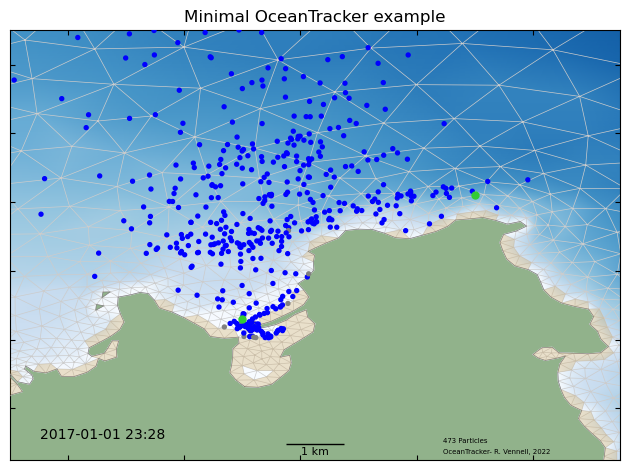

In [4]:
from matplotlib import pyplot as plt
from oceantracker.post_processing.plotting.plot_tracks import animate_particles

# animate particles
anim = animate_particles(tracks, axis_lims=ax,title='Minimal OceanTracker example', 
                         show_dry_cells=True, show_grid=True, show=False) # use ipython to show video, rather than matplotlib plt.show()

# this is slow to build! 
HTML(anim.to_html5_video())